<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

Привет еще раз. Спасибо, что доделал работу. Оформление комментариев по работе сохраняется. Только обозначим, что это вторая итерация. Давай приступим к проверке. 

</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Привет! Спасибо, что прислал задание:) Меня зовут Слепцов Артем и я буду проверять твой проект. Да, это снова я) Ты проделал большую работу над проектом, давай его еще улучшим. Будет здорово, если ты, надеюсь, не против, если я буду на ты,  будешь отвечать на комментарии и участвовать в диалоге. 

Мои комментарии обозначены пометкой **Комментарий ревьюера**. Далее в файле ты сможешь найти их в похожих ячейках (если фон комментария <font color=green>зелёный</font> - всё сделано правильно. Рекомендации укажу таким же цветом; <font color=orange>оранжевый</font> - некритичные замечания. Если таких замечаний меньше трех - проект может быть принят без их отработки; <font color=red>красный</font> - нужно переделать). Не удаляй эти комментарии и постарайся учесть их в ходе выполнения данного проекта. 

</div>

## Описание проекта

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Содержание
* [Шаг 1. Изучение общей информации](#open_file)
  * [Анализ входных данных](#open_file.analysis)
    * [Пользователи](#open_file.analysis.users)
    * [Звонки](#open_file.analysis.calls)
    * [Сообщения](#open_file.analysis.messages)
    * [Интернет](#open_file.analysis.internet)
    * [Тарифы](#open_file.analysis.tariffs)
* [Шаг 2. Подготовка данных](#data_preprocessing)
  * [Переименование столбцов](#data_preprocessing.rename)
  * [Обработка ошибок в данных](#data_preprocessing.missing)
    * [Звонки](#data_preprocessing.missing.calls)
    * [Интернет](#data_preprocessing.missing.internet)
  * [Изменение типов данных](#data_preprocessing.change_types)
  * [Добавление помесячных значений в таблицу](#data_preprocessing.add_columns)
    * [Количество сделанных звонков и израсходованных минут](#data_preprocessing.add_columns.calls)
    * [Количество отправленных сообщений](#data_preprocessing.add_columns.messages)
    * [Объем израсходованного интернет-трафика](#data_preprocessing.add_columns.internet)
    * [Выручка с каждого пользователя ](#data_preprocessing.add_columns.revenue)
* [Шаг 3. Анализ данных](#data_analysis)
  * [Анализ тарифов](#data_analysis.tariffs)
    * [Звонки](#data_analysis.tariffs.calls)
    * [Сообщения](#data_analysis.tariffs.messages)
    * [Интернет](#data_analysis.tariffs.internet)
    * [Выручка](#data_analysis.tariffs.revenue)
    * [Вывод](#data_analysis.tariffs.conclusion)
  * [Статистический анализ](#data_analysis.statistical)
    * [Звонки](#data_analysis.statistical.calls)
    * [Сообщения](#data_analysis.statistical.messages)
    * [Интернет](#data_analysis.statistical.internet)
    * [Вывод](#data_analysis.statistical.conclusion)
* [Шаг 4. Проверка гипотез](#hypotheses)
  * [Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается](#hypotheses.revenue)
  * [Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов](#hypotheses.city)
* [Шаг 5. Общий вывод](#general_conclusion)

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Вступление в работу очень важно. Так ты поясняешь то, чему она посвящена. Крутая реализация оглавления с использованием гиперссылок.
</div>

<a name="open_file"></a>
## Шаг 1. Изучение общей информации

<a name="open_file.analysis"></a>
### Анализ входных данных

Будем открывать файлы из задания один за одним и анализировать данные, которые в них находятся

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st 

pd.set_option('display.max_columns', None)

Определим функции, которые помогут нам получить основные данные о датасете

In [2]:
def analyze_df(df):
    display(df.head(10))
    display(df.describe())
    print(df.info())

def print_zero_percent(df, column_name):
    print('Процент данных с 0 в столбце {}: {:.2%}'.format(
        column_name,
        df[df[column_name] == 0].shape[0] / df.shape[0]
    ))
    
def print_zero_count(df, column_name):
    print('Количество значений равных 0 в столбце {}: {}'.format(
        column_name,
        df[df[column_name] == 0].shape[0]
    ))
    
def print_nan_percent(df, column_name):
    print('Процент данных с пропускамив столбце {}: {:.2%}'.format(column_name, df[column_name].isnull().sum() / df.shape[0]))
    
def print_column_type(df, column_name):
    print('Тип столбца {}: {}'.format(column_name, df.dtypes[column_name]))
    
def convert_type(df, column_name, new_type, errors='raise'):
    df[column_name] = df[column_name].astype(new_type, errors=errors)   

def compute_normal_range(series):
    min_, q1, q3, max_ = series.quantile([0, 0.25, 0.75, 1])
    iqr = q3 - q1
    return max(min_, q1 - 1.5 * iqr), min(max_, q3 + 1.5 * iqr)

<a name="open_file.analysis.users"></a>
#### Пользователи

**Описание данных**:
- *user_id* — уникальный идентификатор пользователя
- *first_name* — имя пользователя
- *last_name* — фамилия пользователя
- *age* — возраст пользователя (годы)
- *reg_date* — дата подключения тарифа (день, месяц, год)
- *churn_date* — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- *city* — город проживания пользователя
- *tariff* — название тарифного плана

Откроем и проанализиуем файл `users.csv`

In [3]:
users_df = pd.read_csv('/datasets/users.csv')
analyze_df(users_df)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


Проверим, что у нас есть только пользователи тарифов "Смарт" и "Ультра"

In [4]:
users_df['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

351 пользуется тарифом "Смарт", а 149 - "Ультра"

**Выводы**:
* пропуски есть только в столбце `churn_date`, о чем есть упоминание в описании данных.
* столбцы`reg_date` и `churn_date` имеют строковый тип, надо привести к `datetime`

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Здорово, что ты используешь собственные функции в анализе. Она правда помогают нам в получении результатов и построении выводов.

</div>

<a name="open_file.analysis.calls"></a>
#### Звонки

**Описание данных**:
- *id* — уникальный номер звонка
- *call_date* — дата звонка
- *duration* — длительность звонка в минутах
- *user_id* — идентификатор пользователя, сделавшего звонок

Откроем и проанализиуем файл `calls.csv`

In [5]:
calls_df = pd.read_csv('/datasets/calls.csv')
analyze_df(calls_df)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None


Видно, что минимальная продолжительности звонка - 0, построим гистограмму для значений

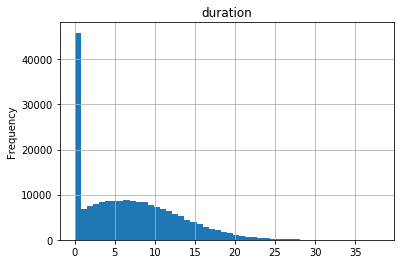

Процент данных с 0 в столбце duration: 19.55%


In [6]:
calls_df['duration'].plot(kind='hist', bins=50, grid=True, title='duration')
plt.show()
print_zero_percent(calls_df, 'duration')

**Выводы**:
* очень много разговоров длиной 0.  
  В описании тарифов написано что «Мегалайн» всегда округляет вверх значения минут и мегабайтов.   
  Есть предположение, что это может быть из-за пропущенных звонков, 20% выглядит достоверно для этой теории.
* столбец `call_date` надо преобразовать к `datetime`
* можно добавить в столбец `duration` информацию о единицах измерения (т.е переименовать из `duration` в `duration_minutes`)

<a name="open_file.analysis.messages"></a>
#### Сообщения

**Описание данных:**
- *id* — уникальный номер сообщения
- *message_date* — дата сообщения
- *user_id* — идентификатор пользователя, отправившего сообщение

Откроем и проанализиуем файл `messages.csv`

In [7]:
messages_df = pd.read_csv('/datasets/messages.csv')
analyze_df(messages_df)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None


**Выводы**:
* столбец `message_date` надо преобразовать к `datetime`

<a name="open_file.analysis.internet"></a>
#### Интернет

**Описание данных**:
- *id* — уникальный номер сессии
- *mb_used* — объём потраченного за сессию интернет-трафика (в мегабайтах)
- *session_date* — дата интернет-сессии
- *user_id* — идентификатор пользователя

Откроем и проанализиуем файл `internet.csv`

In [8]:
internet_df = pd.read_csv('/datasets/internet.csv')
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Видим, что в файле `internet.csv` есть столбец с индексом, считаем файл заново

In [9]:
internet_df = pd.read_csv('/datasets/internet.csv', index_col=0)
analyze_df(internet_df)

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
5,1000_5,399.97,2018-10-02,1000
6,1000_6,540.08,2018-09-07,1000
7,1000_7,415.70,2018-07-11,1000
8,1000_8,505.40,2018-10-08,1000
9,1000_9,345.54,2018-09-03,1000


,mb_used,user_id
count,149396.000000,149396.000000
mean,370.192426,1252.099842
std,278.300951,144.050823
min,0.000000,1000.000000
25%,138.187500,1130.000000
50%,348.015000,1251.000000
75%,559.552500,1380.000000
max,1724.830000,1499.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB
None


<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

index_col помогает нам сделать данный столбец индексами, коим он и является. 

</div>

Видно, что минимальное кол-во потраченного трафика за сессию - 0.  
Посмотрим сколько всего таких сессий.  

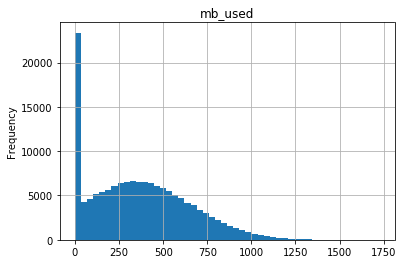

Процент данных с 0 в столбце mb_used: 13.12%


In [10]:
internet_df['mb_used'].plot(kind='hist', bins=50, grid=True, title='mb_used')
plt.show()
print_zero_percent(internet_df, 'mb_used')

Опять видим пик в 0, как и в случае длины разговоров.  
Причина наверно в неверном округлении

**Выводы**:
* много 0 в столбце `mb_used`
* столбец `session_date` надо преобразовать к `datetime`

<div class="alert alert-danger">
<h2> Комментарий ревьюера </h2>

На всех графиках работы проверь подписи осей, а также названия рисунков. Без этого порой непонятно, что именно ты анализируешь. 

</div>

<div class="alert alert-info">
Добавил
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

Названия лучше перенести на ось X. Именно ось следует так назвать. А в названии привести что-то по типу "Гистограмма ....".

</div>

<a name="open_file.analysis.tariffs"></a>
#### Тарифы

**Описание данных**:
- *tariff_name* — название тарифа
- *rub_monthly_fee* — ежемесячная абонентская плата в рублях
- *minutes_included* — количество минут разговора в месяц, включённых в абонентскую плату
- *messages_included* — количество сообщений в месяц, включённых в абонентскую плату
- *mb_per_month_included* — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- *rub_per_minute* — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- *rub_per_message* — стоимость отправки сообщения сверх тарифного пакета
- *rub_per_gb* — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

Откроем и проанализиуем файл `tariffs.csv`

In [11]:
tariffs_df = pd.read_csv('/datasets/tariffs.csv')
analyze_df(tariffs_df)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None


**Выводы**:
* неверное название столбца `mg_per_month_included`, надо будет переименовать в `mb_per_month_included`
* `tariff_name` и `tariff` из датафрейма с пользователями обозначают одно и то же, надо будет унифицировать названия.
* интернет, включенный в абонентскую плату указан в mb, а дополнительный трафик в gb.  
  Надо будет перевести цену дополнительный трафика в mb  

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Подумай также о возможных причинах появления ошибок в данных, а также о том, являются ли они случайными или нет. Можно высказать предварительные варианты их обработки. 

Первый взгляд на таблицы выполнен.

</div>

<a name="data_preprocessing"></a>
## Шаг 2. Подготовка данных

<a name="data_preprocessing.rename"></a>
### Переименование столбцов

Переименуем столбец `mg_per_month_included` на `mb_per_month_included` в датафрейме `tariffs_df`

In [12]:
tariffs_df = tariffs_df.rename(columns={'mg_per_month_included': 'mb_per_month_included'})
tariffs_df.columns.tolist()

['messages_included',
 'mb_per_month_included',
 'minutes_included',
 'rub_monthly_fee',
 'rub_per_gb',
 'rub_per_message',
 'rub_per_minute',
 'tariff_name']

Переименуем столбец `tariff` на `tariff_name` в датафрейме `users_df`, чтобы он совпадал по имени со столбцом из `tariffs_df` 

In [13]:
users_df = users_df.rename(columns={'tariff': 'tariff_name'})
users_df.columns.tolist()

['user_id',
 'age',
 'churn_date',
 'city',
 'first_name',
 'last_name',
 'reg_date',
 'tariff_name']

Переименуем столбец `duration` на `duration_minutes` в датафрейме `calls_df`, чтобы были понятны единицы измерения 

In [14]:
calls_df = calls_df.rename(columns={'duration': 'duration_minutes'})
calls_df.columns.tolist()

['id', 'call_date', 'duration_minutes', 'user_id']

<a name="data_preprocessing.missing"></a>
### Обработка ошибок в данных

<a name="data_preprocessing.missing.calls"></a>
#### Звонки 

Сначала округлим значения в большую сторону при помощи метода `ceil` и выведем общую информацию о звонках

In [15]:
calls_df['duration_minutes'] = calls_df['duration_minutes'].apply(np.ceil)
print(calls_df['duration_minutes'].describe())
print_zero_count(calls_df, 'duration_minutes')
print_zero_percent(calls_df, 'duration_minutes')

count    202607.000000
mean          7.158198
std           5.959173
min           0.000000
25%           2.000000
50%           6.000000
75%          11.000000
max          38.000000
Name: duration_minutes, dtype: float64
Количество значений равных 0 в столбце duration_minutes: 39613
Процент данных с 0 в столбце duration_minutes: 19.55%


<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Верно, что округление производится до суммирования. Это согласуется с тем, как оператор фиксирует выручку.

</div>

Заметно, что в данных много 0, посмортим сильно ли изменятся данные, если заменить 0 на 1

In [16]:
calls_df_no_zeroes = calls_df.replace(0, 1)
print(calls_df_no_zeroes['duration_minutes'].describe())

count    202607.000000
mean          7.353714
std           5.733230
min           1.000000
25%           2.000000
50%           6.000000
75%          11.000000
max          38.000000
Name: duration_minutes, dtype: float64


Видим, что эта замена не повлияет на медиану и немного повлияет на среднее.  
Предположение состоит в том, что это пропущенные вызовы, 19.55% выглядит реалистично. 

<a name="data_preprocessing.missing.internet"></a>
#### Интернет 

Так же как для звонков округлим значения в большую сторону и выведем общую информацию о интернет-сессиях 

In [17]:
internet_df['mb_used'] = internet_df['mb_used'].apply(np.ceil)
print(internet_df['mb_used'].describe())
print_zero_count(internet_df, 'mb_used')
print_zero_percent(internet_df, 'mb_used')

count    149396.000000
mean        370.622098
std         278.387019
min           0.000000
25%         139.000000
50%         349.000000
75%         560.000000
max        1725.000000
Name: mb_used, dtype: float64
Количество значений равных 0 в столбце mb_used: 19598
Процент данных с 0 в столбце mb_used: 13.12%


Проблема с интернет сессиями такая же, как с вызовами: много значений равных 0.  
Попробуем заменить 0 на 1

In [18]:
internet_df_no_zeroes = internet_df.replace(0, 1)
print(internet_df_no_zeroes['mb_used'].describe())

count    149396.000000
mean        370.753280
std         278.212524
min           1.000000
25%         139.000000
50%         349.000000
75%         560.000000
max        1725.000000
Name: mb_used, dtype: float64


Значения поменяются слабо, поэтому можно оставить данные как есть.  
13.12% проблем с установкой интренет соединения выглядит реалиситчно.

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Исходя из описанных гипотез звонки с нулевой длительностью, а также интернет-сессии нулевой длительности обработаны правильным образом.

</div>

<a name="data_preprocessing.missing.tariffs"></a>
#### Тарифы

Добавим цену за mb в информацию о тарифах 

In [19]:
tariffs_df['rub_per_mb'] = tariffs_df['rub_per_gb'] / 1024
display(tariffs_df.info())
tariffs_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 9 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
rub_per_mb               2 non-null float64
dtypes: float64(1), int64(7), object(1)
memory usage: 272.0+ bytes


None

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,rub_per_mb
0,50,15360,500,550,200,3,3,smart,0.195312
1,1000,30720,3000,1950,150,1,1,ultra,0.146484


<a name="data_preprocessing.change_types"></a>
### Изменение типов данных

Список столбцов и датафреймов, в которых необходимо перевести даты в тип `datetime`:
* `reg_date` и `churn_date` - `users_df`
* `call_date` - `calls_df`
* `message_date` - `messages_df`
* `session_date` - `internet_df`  

Сначала посмотрим, в каких форматах представлена дата в них 

In [20]:
print(users_df['reg_date'].head(1))
print(users_df[users_df['churn_date'].notnull()]['churn_date'].head(1))
print(calls_df['call_date'].head(1))
print(messages_df['message_date'].head(1))
print(internet_df['session_date'].head(1))

0    2018-05-25
Name: reg_date, dtype: object
19    2018-10-05
Name: churn_date, dtype: object
0    2018-07-25
Name: call_date, dtype: object
0    2018-06-27
Name: message_date, dtype: object
0    2018-11-25
Name: session_date, dtype: object


У всех дат одинаковый формат - `%Y-%m-%d`. Изменим тип всех столбцов на `datetime`

In [21]:
date_format = '%Y-%m-%d'

column_to_df = {
    'reg_date': users_df,
    'churn_date': users_df, 
    'call_date' : calls_df,
    'message_date': messages_df,
    'session_date': internet_df,
}

for column, df in column_to_df.items():
    df[column] = pd.to_datetime(df[column], format=date_format)
    print_column_type(df, column)


Тип столбца reg_date: datetime64[ns]
Тип столбца churn_date: datetime64[ns]
Тип столбца call_date: datetime64[ns]
Тип столбца message_date: datetime64[ns]
Тип столбца session_date: datetime64[ns]


Также можно перевести значения округленных на [предыдущем шаге](#data_preprocessing.missing) времени звонка и количества мегабайт за сессию в `int`

In [22]:
calls_df['duration_minutes'] = calls_df['duration_minutes'].astype('int')
internet_df['mb_used'] = internet_df['mb_used'].astype('int')

print_column_type(calls_df, 'duration_minutes')
print_column_type(internet_df, 'mb_used')

Тип столбца duration_minutes: int64
Тип столбца mb_used: int64


<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Ошибки в таблицах исправлены. Данные подготовлены к дальнейшим расчетам. 

</div>

<a name="data_preprocessing.add_columns"></a>
### Добавление помесячных значений в таблицу

Заведем пустой датафрейм для того, чтобы поместить в него агрегированную информацию по месяцам

In [23]:
data_by_month_df = pd.DataFrame()

Определим функцию для подсчета сводных таблиц, сагрегированных по `user_id` и `month` 

In [24]:
def create_pivot_table_by_user_and_month(df, values, **kwargs): 
    return df.pivot_table(index=['user_id', 'month'], values=values, **kwargs)

<a name="data_preprocessing.add_columns.calls"></a>
#### Количество сделанных звонков и израсходованных минут

Добавим столбец `month` в `calls_df`, в него запишем месяц совершения звонка

In [25]:
calls_df['month'] = pd.DatetimeIndex(calls_df['call_date']).month
calls_df.head(5)

,id,call_date,duration_minutes,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


Теперь построим сводную таблицу сагрегировав `duration_minutes` по `user_id` и `month` 

In [26]:
calls_by_month = create_pivot_table_by_user_and_month(calls_df, values='duration_minutes', aggfunc=['count', 'sum'])
display(calls_by_month.head(5))

count              sum
              duration_minutes duration_minutes
user_id month                                  
1000    5                   22              159
        6                   43              172
        7                   47              340
        8                   52              408
        9                   58              466

Теперь пернесем данные из сводной таблицы в датафрейм `data_by_month_df`

In [27]:
calls_by_month_df = pd.DataFrame(calls_by_month.to_records())
calls_by_month_df = calls_by_month_df.rename(
    columns = {
        calls_by_month_df.columns[2]: 'calls_count', 
        calls_by_month_df.columns[3]: 'minutes_sum'
    }
)

data_by_month_df = calls_by_month_df
display(data_by_month_df.head(5))

,user_id,month,calls_count,minutes_sum
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466


<a name="data_preprocessing.add_columns.messages"></a>
#### Количество отправленных сообщений

Добавим столбец `month` в `messages_df`

In [28]:
messages_df['month'] = pd.DatetimeIndex(messages_df['message_date']).month
messages_df.head(5)

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


Теперь построим сводную таблицу, объединив кол-во сообщений по  `user_id` и `month` 

In [29]:
messages_by_month = create_pivot_table_by_user_and_month(messages_df, 'id', aggfunc='count') 
messages_by_month.head(5)

id
user_id month    
1000    5      22
        6      60
        7      75
        8      81
        9      57

Перенесем данные из сводной таблицы в датафрейм `data_by_month_df`

In [30]:
messages_by_month_df = pd.DataFrame(messages_by_month.to_records())
messages_by_month_df = messages_by_month_df.rename(columns={'id': 'messages_count'})

data_by_month_df = data_by_month_df.merge(messages_by_month_df, on=['user_id', 'month'], how='outer')
display(data_by_month_df.head(5))

,user_id,month,calls_count,minutes_sum,messages_count
0,1000,5,22.0,159.0,22.0
1,1000,6,43.0,172.0,60.0
2,1000,7,47.0,340.0,75.0
3,1000,8,52.0,408.0,81.0
4,1000,9,58.0,466.0,57.0


<a name="data_preprocessing.add_columns.internet"></a>
#### Объем израсходованного интернет-трафика

Добавим столбец `month` в `internet_df`

In [31]:
internet_df['month'] = pd.DatetimeIndex(internet_df['session_date']).month
internet_df.head(5)

,id,mb_used,session_date,user_id,month
0,1000_0,113,2018-11-25,1000,11
1,1000_1,1053,2018-09-07,1000,9
2,1000_2,1198,2018-06-25,1000,6
3,1000_3,551,2018-08-22,1000,8
4,1000_4,303,2018-09-24,1000,9


Построим сводную таблицу по `mb_used`

In [32]:
internet_by_month = create_pivot_table_by_user_and_month(internet_df, values='mb_used', aggfunc='sum')
internet_by_month.head(5)

mb_used
user_id month         
1000    5         2256
        6        23257
        7        14016
        8        14070
        9        14581

Перенесем данные из своднй таблицы

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Показатели рассчитаны верно. Осталось их соединить вместе. 

</div>

In [33]:
internet_by_month_df = pd.DataFrame(internet_by_month.to_records())
internet_by_month_df = internet_by_month_df.rename(columns={'mb_used': 'mb_used_sum'})

data_by_month_df = data_by_month_df.merge(internet_by_month_df, on=['user_id', 'month'], how='outer')
display(data_by_month_df.head(5))

,user_id,month,calls_count,minutes_sum,messages_count,mb_used_sum
0,1000,5,22.0,159.0,22.0,2256.0
1,1000,6,43.0,172.0,60.0,23257.0
2,1000,7,47.0,340.0,75.0,14016.0
3,1000,8,52.0,408.0,81.0,14070.0
4,1000,9,58.0,466.0,57.0,14581.0


<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Да, именно внешнее соединение нам и нужно в данном случае. Иначе в таблицу не попадут клиенты, которые не пользовались одним из видов услуг оператора в течение конкретного месяца. 

</div>

Посмотрим информацию о полученной таблице

In [34]:
data_by_month_df.info()
print_nan_percent(data_by_month_df, 'calls_count')
print_nan_percent(data_by_month_df, 'minutes_sum')
print_nan_percent(data_by_month_df, 'messages_count')
print_nan_percent(data_by_month_df, 'mb_used_sum')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 6 columns):
user_id           3214 non-null int64
month             3214 non-null int64
calls_count       3174 non-null float64
minutes_sum       3174 non-null float64
messages_count    2717 non-null float64
mb_used_sum       3203 non-null float64
dtypes: float64(4), int64(2)
memory usage: 175.8 KB
Процент данных с пропускамив столбце calls_count: 1.24%
Процент данных с пропускамив столбце minutes_sum: 1.24%
Процент данных с пропускамив столбце messages_count: 15.46%
Процент данных с пропускамив столбце mb_used_sum: 0.34%


Скорее всего пропуски появились из-за того, что пользователь не пользовался какой-то из услуг в определенный месяц.
Этот вывод можно сделать из-за того, что кол-во пропусков в `calls_count` и `minutes_sum` одинаковое.  
Заменим пропуски на 0 и конвертируем типы в `int`

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Пропуски берутся именно по причине неиспользования всего спектра услуг оператора. 

</div>

In [35]:
services = ('calls_count', 'minutes_sum', 'messages_count', 'mb_used_sum')

for service in services: 
    data_by_month_df[service] = data_by_month_df[service].fillna(0)
    convert_type(data_by_month_df, service, 'int')

data_by_month_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 6 columns):
user_id           3214 non-null int64
month             3214 non-null int64
calls_count       3214 non-null int64
minutes_sum       3214 non-null int64
messages_count    3214 non-null int64
mb_used_sum       3214 non-null int64
dtypes: int64(6)
memory usage: 175.8 KB


Избавились от пропусков и поменяли типы.

<a name="data_preprocessing.add_columns.revenue"></a>
#### Выручка с каждого пользователя

Объединим датафрейм `data_by_month_df` с `users_df` по столбцу `user_id`

In [36]:
data_by_month_df = data_by_month_df.merge(users_df, on='user_id', how='left')
data_by_month_df.head(5)

,user_id,month,calls_count,minutes_sum,messages_count,mb_used_sum,age,churn_date,city,first_name,last_name,reg_date,tariff_name
0,1000,5,22,159,22,2256,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,43,172,60,23257,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,47,340,75,14016,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,52,408,81,14070,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,58,466,57,14581,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


Теперь объединим результат с `tariffs_df` по `tariff_name`

In [37]:
data_by_month_df = data_by_month_df.merge(tariffs_df, on='tariff_name', how='left')
data_by_month_df.head(5)

,user_id,month,calls_count,minutes_sum,messages_count,mb_used_sum,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,rub_per_mb
0,1000,5,22,159,22,2256,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.146484
1,1000,6,43,172,60,23257,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.146484
2,1000,7,47,340,75,14016,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.146484
3,1000,8,52,408,81,14070,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.146484
4,1000,9,58,466,57,14581,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.146484


Добавим новый столбец `rub_revenue`, в который запишем доход от каждого пользователя за месяц:
* вычесть беслатный лимит из звонков, сообщений и интернет тарифа
* умножить остаток на значения из тарифного плана
* добавить абонентскую плату
Для этого определим функцию и применим ее к датасету `data_by_month_df`

In [38]:
def calculate_rub_revenue(row):
    minutes_not_included = max(row['minutes_sum'] - row['minutes_included'], 0)
    messages_not_included = max(row['messages_count'] - row['messages_included'], 0)
    mb_used_not_included = max(row['mb_used_sum'] - row['mb_per_month_included'], 0)
    
    minutes_revenue = minutes_not_included * row['rub_per_minute']
    messages_revenue = messages_not_included * row['rub_per_message']
    mb_used_revenue = mb_used_not_included * row['rub_per_mb']

    return minutes_revenue + messages_revenue + mb_used_revenue + row['rub_monthly_fee']


data_by_month_df['rub_revenue'] = data_by_month_df.apply(calculate_rub_revenue, axis=1)
data_by_month_df['rub_revenue_over_fee'] = data_by_month_df['rub_revenue'] - data_by_month_df['rub_monthly_fee']

# переведем стобцы к типу int
data_by_month_df['rub_revenue'] = data_by_month_df['rub_revenue'].astype('int')
data_by_month_df['rub_revenue_over_fee'] = data_by_month_df['rub_revenue_over_fee'].astype('int')

display(data_by_month_df.head(5))
print(data_by_month_df.info())

,user_id,month,calls_count,minutes_sum,messages_count,mb_used_sum,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,rub_per_mb,rub_revenue,rub_revenue_over_fee
0,1000,5,22,159,22,2256,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.146484,1950,0
1,1000,6,43,172,60,23257,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.146484,1950,0
2,1000,7,47,340,75,14016,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.146484,1950,0
3,1000,8,52,408,81,14070,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.146484,1950,0
4,1000,9,58,466,57,14581,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.146484,1950,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 23 columns):
user_id                  3214 non-null int64
month                    3214 non-null int64
calls_count              3214 non-null int64
minutes_sum              3214 non-null int64
messages_count           3214 non-null int64
mb_used_sum              3214 non-null int64
age                      3214 non-null int64
churn_date               187 non-null datetime64[ns]
city                     3214 non-null object
first_name               3214 non-null object
last_name                3214 non-null object
reg_date                 3214 non-null datetime64[ns]
tariff_name              3214 non-null object
messages_included        3214 non-null int64
mb_per_month_included    3214 non-null int64
minutes_included         3214 non-null int64
rub_monthly_fee          3214 non-null int64
rub_per_gb               3214 non-null int64
rub_per_message          3214 non-null int64
rub_per_minute   

Уберем все неиспользуемые данные из `data_by_month_df`

In [39]:
data_by_month_df = data_by_month_df.drop([
    'age', 'churn_date', 'first_name', 'last_name', 'reg_date', 'messages_included', 'mb_per_month_included', 
    'minutes_included', 'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute', 'rub_per_mb'
], axis=1)
data_by_month_df.info() 
data_by_month_df.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 10 columns):
user_id                 3214 non-null int64
month                   3214 non-null int64
calls_count             3214 non-null int64
minutes_sum             3214 non-null int64
messages_count          3214 non-null int64
mb_used_sum             3214 non-null int64
city                    3214 non-null object
tariff_name             3214 non-null object
rub_revenue             3214 non-null int64
rub_revenue_over_fee    3214 non-null int64
dtypes: int64(8), object(2)
memory usage: 276.2+ KB


,user_id,month,calls_count,minutes_sum,messages_count,mb_used_sum,city,tariff_name,rub_revenue,rub_revenue_over_fee
0,1000,5,22,159,22,2256,Краснодар,ultra,1950,0
1,1000,6,43,172,60,23257,Краснодар,ultra,1950,0
2,1000,7,47,340,75,14016,Краснодар,ultra,1950,0
3,1000,8,52,408,81,14070,Краснодар,ultra,1950,0
4,1000,9,58,466,57,14581,Краснодар,ultra,1950,0


In [40]:
data_by_month_df['rub_revenue'].describe()

count    3214.000000
mean     1486.634101
std       783.896681
min       550.000000
25%       694.000000
50%      1562.500000
75%      1950.000000
max      6711.000000
Name: rub_revenue, dtype: float64

Видим, что в значениях есть очень большие величины, посмотрим на диаграмму размаха и гистограмму

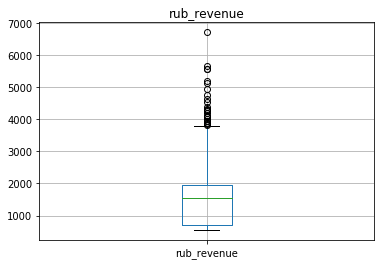

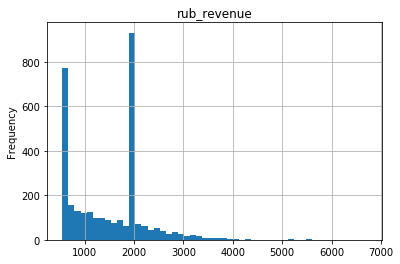

(550.0, 3834.0)


In [41]:
data_by_month_df['rub_revenue'].plot(kind='box', grid=True, title='rub_revenue')
plt.show()

data_by_month_df['rub_revenue'].plot(kind='hist', bins=50, grid=True, title='rub_revenue')
plt.show()

print(compute_normal_range(data_by_month_df['rub_revenue']))

Видим пики в районе 550 и 1950, это логично, ведь это ежемесячные платы за тарифы.  
Построим диаграмму размаха.  

Возьмем новые границы и проверим, что мы не удалили много значений

In [42]:
data_by_month_df = data_by_month_df.query('550 <= rub_revenue <= 3834')
data_by_month_df['rub_revenue'].describe()

count    3186.000000
mean     1460.186441
std       731.645058
min       550.000000
25%       691.000000
50%      1539.000000
75%      1950.000000
max      3802.000000
Name: rub_revenue, dtype: float64

Мы получили датасет со всемии необходимыми данными, сгруппированными по месяцам:
* количество звонков, минут разговора, сообщений и использованных мегабайт
* выручку и перерасход каждого пользователя 

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Финальная таблица получена верным образом. Здорово, что она не содержит излишней информации в виде имени или фамилии клиента. Такая информация никак не поможет нам в анализе, поэтому хранить ее повторно не стоит.

</div>

<a name="data_analysis"></a>
## Шаг 3. Анализ данных

Перед анализом потребностей пользователей объединим данные из `data_by_month_df` по тарифу 

<div class="alert alert-info">
Вычислим среднее и дисперсию
</div>

In [43]:
data_by_tariff_df = data_by_month_df.pivot_table(
    index=['tariff_name'],
    values=['calls_count', 'minutes_sum', 'messages_count', 'mb_used_sum', 'rub_revenue_over_fee', 'rub_revenue'],
    aggfunc=['mean', 'var']
)
data_by_tariff_df.head(5)

mean                                                        \
            calls_count   mb_used_sum messages_count minutes_sum  rub_revenue   
tariff_name                                                                     
smart         57.990489  16083.710598      33.341938  414.449728  1200.862319   
ultra         73.311861  19299.991820      49.347648  525.966258  2045.654397   

                                          var                               \
            rub_revenue_over_fee  calls_count   mb_used_sum messages_count   
tariff_name                                                                  
smart                 650.862319   647.008065  3.243123e+07     790.042971   
ultra                  95.654397  1918.456379  9.770752e+07    2272.994677   

                                                                
               minutes_sum    rub_revenue rub_revenue_over_fee  
tariff_name                                                     
smart         34762.665347  510808.271022        510808.271022  
ultra        100286.476854   96083.344100         96083.344100

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

Отлично, мы имеем всю необходимую информацию по услугам тарифов оператора. 

</div>

<a name="data_analysis.tariffs"></a>
### Анализ тарифов

<a name="data_analysis.tariffs.calls"></a>
#### Звонки

In [44]:
data_by_tariff_df['mean'][['calls_count', 'minutes_sum']]

,calls_count,minutes_sum
tariff_name,,
smart,57.990489,414.449728
ultra,73.311861,525.966258


In [45]:
data_by_tariff_df['var'][['calls_count', 'minutes_sum']]

,calls_count,minutes_sum
tariff_name,,
smart,647.008065,34762.665347
ultra,1918.456379,100286.476854


Пользователи тарифа *Ультра* совершают больше звонков и общаются больше минут, чем пользователи тарифа *Смарт*

<a name="data_analysis.tariffs.messages"></a>
#### Сообщения

In [46]:
data_by_tariff_df['mean'][['messages_count']]

,messages_count
tariff_name,
smart,33.341938
ultra,49.347648


In [47]:
data_by_tariff_df['var'][['messages_count']]

,messages_count
tariff_name,
smart,790.042971
ultra,2272.994677


Пользователи тарифа *Ультра* отсылают больше сообщений

<a name="data_analysis.tariffs.internet"></a>
#### Интернет

In [48]:
data_by_tariff_df['mean'][['mb_used_sum']]

,mb_used_sum
tariff_name,
smart,16083.710598
ultra,19299.991820


In [49]:
data_by_tariff_df['var'][['mb_used_sum']]

,mb_used_sum
tariff_name,
smart,3.243123e+07
ultra,9.770752e+07


Пользователи тарифа *Ультра* используют больше интренет-трафика 

<a name="data_analysis.tariffs.revenue"></a>
#### Выручка

In [50]:
data_by_tariff_df['mean'][['rub_revenue', 'rub_revenue_over_fee']]

,rub_revenue,rub_revenue_over_fee
tariff_name,,
smart,1200.862319,650.862319
ultra,2045.654397,95.654397


In [51]:
data_by_tariff_df['var'][['rub_revenue', 'rub_revenue_over_fee']]

,rub_revenue,rub_revenue_over_fee
tariff_name,,
smart,510808.271022,510808.271022
ultra,96083.344100,96083.344100


Пользователи тарифа *Ультра* платят за связь больше в 1.7 раза, в то же время пользователи тарифа *Смарт* платят за дополнительные услуги в 6.2 раз больше.

<a name="data_analysis.tariffs.conclusion"></a>
#### Вывод

* Пользователи тарифа *Ультра* используют больше услуг и платят больше за услуги связи
* Пользователи тарифа *Смарт* используют меньше услуг и платят больше за дополнительные услуги

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Здесь ты привел показатели по средним значениям. Также хорошо бы проанализировать дисперсию по услугам оператора. Это можно сделать, передав в aggfunc метод 'var'.

</div>

<a name="data_analysis.statistical"></a>
### Статистический анализ 

Получим срезы по каждому из тарифов из датафрейма `data_by_month_df` 

In [52]:
data_by_month_ultra_df = data_by_month_df[data_by_month_df['tariff_name'] == 'ultra']
data_by_month_smart_df = data_by_month_df[data_by_month_df['tariff_name'] == 'smart']

Выведем информацию про `data_by_month_ultra_df` 

In [53]:
display(data_by_month_ultra_df.head(5))
print(data_by_month_ultra_df.info())

,user_id,month,calls_count,minutes_sum,messages_count,mb_used_sum,city,tariff_name,rub_revenue,rub_revenue_over_fee
0,1000,5,22,159,22,2256,Краснодар,ultra,1950,0
1,1000,6,43,172,60,23257,Краснодар,ultra,1950,0
2,1000,7,47,340,75,14016,Краснодар,ultra,1950,0
3,1000,8,52,408,81,14070,Краснодар,ultra,1950,0
4,1000,9,58,466,57,14581,Краснодар,ultra,1950,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 978 entries, 0 to 3213
Data columns (total 10 columns):
user_id                 978 non-null int64
month                   978 non-null int64
calls_count             978 non-null int64
minutes_sum             978 non-null int64
messages_count          978 non-null int64
mb_used_sum             978 non-null int64
city                    978 non-null object
tariff_name             978 non-null object
rub_revenue             978 non-null int64
rub_revenue_over_fee    978 non-null int64
dtypes: int64(8), object(2)
memory usage: 84.0+ KB
None


Выведем информацию про `data_by_month_smart_df` 

In [54]:
display(data_by_month_smart_df.head(5))
print(data_by_month_smart_df.info())

,user_id,month,calls_count,minutes_sum,messages_count,mb_used_sum,city,tariff_name,rub_revenue,rub_revenue_over_fee
8,1001,11,59,430,0,18452,Москва,smart,1153,603
9,1001,12,63,414,0,14053,Москва,smart,550,0
10,1002,6,15,117,4,10871,Стерлитамак,smart,550,0
11,1002,7,26,214,11,17601,Стерлитамак,smart,987,437
12,1002,8,42,289,13,20347,Стерлитамак,smart,1524,974


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2208 entries, 8 to 3212
Data columns (total 10 columns):
user_id                 2208 non-null int64
month                   2208 non-null int64
calls_count             2208 non-null int64
minutes_sum             2208 non-null int64
messages_count          2208 non-null int64
mb_used_sum             2208 non-null int64
city                    2208 non-null object
tariff_name             2208 non-null object
rub_revenue             2208 non-null int64
rub_revenue_over_fee    2208 non-null int64
dtypes: int64(8), object(2)
memory usage: 189.8+ KB
None


Создадим класс, который поможет нам в анализе данных

In [55]:
from collections import namedtuple 

TariffStat = namedtuple(
    'TariffStat', 
    [
        'ultra_mean',
        'smart_mean',
        'ultra_median',
        'smart_median',
        'ultra_std',
        'smart_std',
        'ultra_var',
        'smart_var',
        'ultra_range',
        'smart_range',
    ]
)

class TariffStats(object):
    def __init__(self):
        self._statistics_df = pd.DataFrame(
            columns=['statistics', 'ultra', 'smart']
        )
    
    def process(self, metrics_prefix, ultra_series, smart_series, save=False):        
        stat = self._compute_stat(ultra_series, smart_series)
        
        self._print_stat(stat)
        self._plot_hist(metrics_prefix, ultra_series, smart_series)
        
        if save:
            self._save_stat(metrics_prefix, stat)

    def _compute_stat(self, ultra_series, smart_series):
        # mean
        ultra_mean = ultra_series.mean()
        smart_mean = smart_series.mean()
        
        # median
        ultra_median = ultra_series.median()
        smart_median = smart_series.median()
        
        # std 
        ultra_std = ultra_series.std()
        smart_std = smart_series.std()
        
        # var 
        ultra_var = np.var(ultra_series, ddof=1)
        smart_var = np.var(smart_series, ddof=1)
        
        # normal_range 
        ultra_range = compute_normal_range(ultra_series)
        smart_range = compute_normal_range(smart_series)
        
        return TariffStat(
            ultra_mean,
            smart_mean,
            ultra_median,
            smart_median,
            ultra_std,
            smart_std,
            ultra_var,
            smart_var,
            ultra_range,
            smart_range,
        )
    
    def _compute_normal_range(self, df):
        min_, q1, q3, max_ = df.quantile([0, 0.25, 0.75, 1])
        iqr = q3 - q1
        return max(min_, q1 - 1.5 * iqr), min(max_, q3 + 1.5 * iqr)
    
    def _print_stat(self, stat): 
        print('Тариф Ультра:')
        print('cреднее - {:.2f}'.format(stat.ultra_mean))
        print('медиана - {:.2f}'.format(stat.ultra_median))
        print('стандартное отклонение - {:.2f}'.format(stat.ultra_std))
        print('дисперсия - {:.2f}'.format(stat.ultra_var))
        print('границы нормальных значений - ({:.2f}, {:.2f})'.format(
            stat.ultra_range[0], stat.ultra_range[1]
        ))
        print()
        print('Тариф Смарт:')
        print('cреднее - {:.2f}'.format(stat.smart_mean))
        print('медиана - {:.2f}'.format(stat.smart_median))
        print('стандартное отклонение - {:.2f}'.format(stat.smart_std))
        print('дисперсия - {:.2f}'.format(stat.smart_var))
        print('границы нормальных значений - ({:.2f}, {:.2f})'.format(
            stat.smart_range[0], stat.smart_range[1]
        ))
            
    def _plot_hist(self, metrics_prefix, ultra_series, smart_series):
        ultra_series.plot(kind='hist', bins=50, label='ultra', title=metrics_prefix)
        smart_series.plot(kind='hist', bins=50, label='smart', title=metrics_prefix, alpha=0.6)
        plt.legend(loc='upper right')
        plt.show()
    
    def _save_stat(self, metrics_prefix, stat):
        self._append(metrics_prefix + '_mean', stat.ultra_mean, stat.smart_mean)
        self._append(metrics_prefix + '_median', stat.ultra_median, stat.smart_median)
        self._append(metrics_prefix + '_std', stat.ultra_std, stat.smart_std)
        self._append(metrics_prefix + '_var', stat.ultra_var, stat.smart_var)
        
    def _append(self, stat, ultra_value, smart_value):
        self._statistics_df = self._statistics_df.append({
            'statistics': stat, 
            'ultra': ultra_value, 
            'smart': smart_value
        }, ignore_index=True)
    
    @property
    def data(self):
        return self._statistics_df

tariff_stats = TariffStats()

<a name="data_analysis.statistical.calls"></a>
#### Звонки

Посмотрим статистические данные и гистограммы для продолжительности звонков

Тариф Ультра:
cреднее - 525.97
медиана - 518.50
стандартное отклонение - 316.68
дисперсия - 100286.48
границы нормальных значений - (0.00, 1453.00)

Тариф Смарт:
cреднее - 414.45
медиана - 420.00
стандартное отклонение - 186.45
дисперсия - 34762.67
границы нормальных значений - (0.00, 934.12)


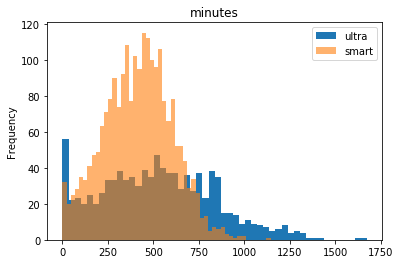

In [56]:
tariff_stats.process('minutes', data_by_month_ultra_df['minutes_sum'], data_by_month_smart_df['minutes_sum'], save=True)

In [57]:
tariff_stats.data

,statistics,ultra,smart
0,minutes_mean,525.966258,414.449728
1,minutes_median,518.500000,420.000000
2,minutes_std,316.680402,186.447487
3,minutes_var,100286.476854,34762.665347


**Выводы**:
* пользователи тарифа *Смарт* в среднем используют 418 минут в месяц при лимите в 500
* пользователи тарифа *Ультра* в среднем используют 527 минут в месяц при лимите в 3000
* среди пользователей *Ультра* больше тех, кто не смог дозвониться

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Круто, целый класс для анализа. Молодец, что опять же используешь их для улучшения качества анализа. Но опять же не подписей осей на графиках и названий рисунков.

</div>

<a name="data_analysis.statistical.messages"></a>
#### Сообщения

Посмотрим статистические данные и гистограммы для количества сообщений

Тариф Ультра:
cреднее - 49.35
медиана - 38.00
стандартное отклонение - 47.68
дисперсия - 2272.99
границы нормальных значений - (0.00, 187.88)

Тариф Смарт:
cреднее - 33.34
медиана - 28.00
стандартное отклонение - 28.11
дисперсия - 790.04
границы нормальных значений - (0.00, 112.50)


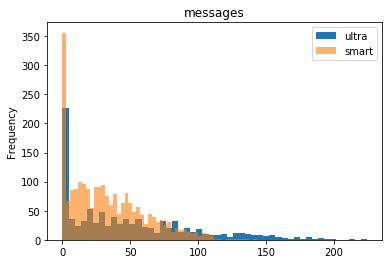

In [58]:
tariff_stats.process('messages', data_by_month_ultra_df['messages_count'], data_by_month_smart_df['messages_count'], save=True)

**Выводы**:
* в среднем пользователи тарифа *Ультра* пользуются сообщениями чаще, 49 сообщений против 33 у *Смарт*
* виден большой пик в 0, скорее всего это связано с тем, что сейчас люди все реже пользуются сообщениями

<a name="data_analysis.statistical.internet"></a>
#### Интернет

Посмотрим статистические данные и гистограммы для количества использованных мегабайт

Тариф Ультра:
cреднее - 19299.99
медиана - 19264.00
стандартное отклонение - 9884.71
дисперсия - 97707520.62
границы нормальных значений - (0.00, 43364.00)

Тариф Смарт:
cреднее - 16083.71
медиана - 16472.00
стандартное отклонение - 5694.84
дисперсия - 32431227.41
границы нормальных значений - (1644.00, 30942.00)


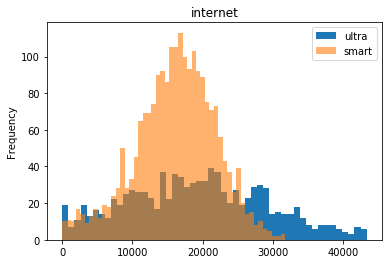

In [59]:
tariff_stats.process('internet', data_by_month_ultra_df['mb_used_sum'], data_by_month_smart_df['mb_used_sum'], save=True)

**Выводы**:
* Среднее количество использованных мегабайт в тарифе *Смарт* равно 16.5 Гб, что больше 15 включенных в абонентскую плату
* Пользователи *Ультра* укладываются в квоту 30 Гб со средним расходом в 19,5 Гб

<a name="data_analysis.statistical.conclusion"></a>
#### Вывод

Выведем транспонированную таблицу с результатами наших вычтслений 

In [60]:
tariff_stats.data.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11
statistics,minutes_mean,minutes_median,minutes_std,minutes_var,messages_mean,messages_median,messages_std,messages_var,internet_mean,internet_median,internet_std,internet_var
ultra,525.966,518.5,316.68,100286,49.3476,38,47.6759,2272.99,19300,19264,9884.71,9.77075e+07
smart,414.45,420,186.447,34762.7,33.3419,28,28.1077,790.043,16083.7,16472,5694.84,3.24312e+07


<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Базовые статистические параметры получены. Приведены все необходимые графики. Здорово, что графики для одинаковых услуг тарифов приведены на одном рисунке. Так удобнее сравнивать тарифы. Также можно привести график по выручке компании с разбиением по тарифу. 

</div>

<a name="hypotheses"></a>
## Шаг 4. Проверка гипотез

<a name="hypotheses.revenue"></a>
### Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

Мы уже [проанализировали](#data_analysis.tariffs.revenue) среднее значения выручки для каждого из тарифов

In [61]:
data_by_tariff_df['mean'][['rub_revenue', 'rub_revenue_over_fee']]

,rub_revenue,rub_revenue_over_fee
tariff_name,,
smart,1200.862319,650.862319
ultra,2045.654397,95.654397


Нулевая гипотеза H<sub>0</sub>: "Средняя выручка пользователей тарифов Ультра и Смарт **не различается**".  
Из нее следует альтернативная гипотеза H<sub>1</sub>: "Средняя выручка пользователей тарифов *Ультра* и *Смарт* **различается**".  
Пороговое значение `alpha` (критический уровень статистической значимости) зададим равным `5%`.

<div class="alert alert-info">

Посмотрим на дисперсии выборок

</div>

In [62]:
print(np.var(data_by_month_smart_df['rub_revenue'],  ddof=1))
print(np.var(data_by_month_ultra_df['rub_revenue'],  ddof=1))

510808.2710217161
96083.34410040334


Дисперсии не равны, выставим `equal_var` раным False

In [63]:
alpha = .05

results = st.ttest_ind(
    data_by_month_smart_df['rub_revenue'], 
    data_by_month_ultra_df['rub_revenue'],
    equal_var = False,
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0
Отвергаем нулевую гипотезу


**Вывод**: 
Наша H<sub>0</sub> гипотеза не подтвердилась, а значит средняя выручка пользователей тарифов *Ультра* и *Смарт* **различается**

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Гипотезы сформулированы и проверены верно. Подтвердить мы ничего не можем. В наших силах лишь опровергнуть или нет нулевую гипотезу. 

</div>

<a name="hypotheses.city"></a>
### Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Посмотрим, какие значения городов есть в нашем датасете `data_by_month_df`

In [64]:
data_by_month_df['city'].unique() 

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Курган', 'Барнаул', 'Красноярск', 'Архангельск', 'Липецк',
       'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Волжский', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

Создадим 2 датасета, один с данными о пользователях из Москвы, второй - со всеми остальными

In [65]:
data_by_month_msk_df = data_by_month_df[data_by_month_df['city'] == 'Москва']
print(data_by_month_msk_df['rub_revenue'].describe())

count     607.000000
mean     1489.034596
std       706.409349
min       550.000000
25%       732.500000
50%      1671.000000
75%      1950.000000
max      3699.000000
Name: rub_revenue, dtype: float64


In [66]:
data_by_month_other_df = data_by_month_df[data_by_month_df['city'] != 'Москва']
print(data_by_month_other_df['rub_revenue'].describe())

count    2579.000000
mean     1453.396665
std       737.428427
min       550.000000
25%       681.500000
50%      1495.000000
75%      1950.000000
max      3802.000000
Name: rub_revenue, dtype: float64


Средняя выручка пользователя из Москвы - 1489 руб., жителя любого другого региона - 1453 руб.

Нулевая гипотеза H<sub>0</sub>: "Средняя выручка пользователей из Москвы **не отличается** от выручки пользователей из других регионов".  
Из нее следует альтернативная гипотеза H<sub>1</sub>: "Средняя выручка пользователей из Москвы **отличается** от выручки пользователей из других регионов".  
Пороговое значение `alpha` (критический уровень статистической значимости) зададим равным `5%`.

<div class="alert alert-info">

Посмотрим на дисперсии выборок

</div>

In [67]:
print(np.var(data_by_month_msk_df['rub_revenue'],  ddof=1))
print(np.var(data_by_month_other_df['rub_revenue'],  ddof=1))

499014.16876811243
543800.6847212267


Дисперсии почти равны, выставим `equal_var` раным True 

In [68]:
alpha = .05

results = st.ttest_ind(
    data_by_month_msk_df['rub_revenue'], 
    data_by_month_other_df['rub_revenue'],
    equal_var = True,
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.28033833372001987
Не получилось отвергнуть нулевую гипотезу


**Вывод**: 
Не удалось отвергнуть H<sub>0</sub> гипотезу, а значит средняя выручка пользователей из Москвы и регионов **не различается**

<div class="alert alert-danger">
<h2> Комментарий ревьюера </h2>

При проверке гипотезы стоит сравнить дисперсии исследуемых выборок. При их различии установить параметр equal_var в нужное положение. В остальном проверка выполнена верно. 

</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

Дисперсии выборок сравнены. Для сравнения их с помощью стат. теста можно использовать данный [метод](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.levene.html). Однако пока можно просто придерживаться правила различия в 5%.

</div>

<a name="general_conclusion"></a>

## Шаг 5. Общий вывод

Была проведена работа по анализу 2-х тарифов оператора "Мегалайн": *Смарт* и *Ультра*.

Сначала данные для звонков и интреснет-соединений были округлены в большую сторону, типы данных были заменены на подходящие.  
После этого была сформирована таблица в которой по месяцам были объеденены следующие параметры: 
* количество звонков и минут
* количество сообщений
* количество исполтзованных мегабайт 
* город 
* название тарифа 
* выручка

После этого эти параметры были проанализированны и проверены 2 гипотезы: 
* средняя выручка пользователей тарифов *Ультра* и *Смарт* различается
* средняя выручка пользователей из Москва отличается от выручки пользователей из других регионов

Результаты:
* тариф *Ультра* приносит оператору больше прибыли, при этом пользователи этого тарифа пользуются большим количеством услуг
* тариф *Смарт* приносит опретору меньше прибыли, но пользователи намного больше тратят на дополнительные услуги  
* удалось подтвердить гипотезу о том, что средняя выручка пользователей тарифов *Ультра* и *Смарт* различается
* гипотеза о том, что средняя выручка пользователей из Москва отличается от выручки пользователей из других регионов была опровергнута

<div class="alert alert-danger">
<h2> Комментарий ревьюера </h2>

Финальный вывод и есть главный результат твоей работы. Стоит писать его подробно по результатам проведенной работы. В нем можно приводить полученные в ходе работы значения. Также можно расписать все, что было сделано в работе.

</div>

<div class="alert alert-info">

Дополнил вывод

</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

Вывод стал лучше. Ты ответил на основные вопросы проекта. Можно также дать конкретные рекомендации для компании по дальнейшим действиям. 

</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

Помарки ты исправил, молодец. Теперь работа выполнена хорошо. Успехов в дальнейших проектах :)

</div>
   

<div class="alert alert-warning">
<h2> Комментарий ревьюера </h2>

Если тебе нравится тема визуализации, то можешь изучить другие методы библиотеки seaborn. Она позволяет строить довольно презентабельные графики.

Ты проделал большую работу, молодец! Критических замечаний немного. Проверь подписи осей на всех рисунках работы. Уточни про параметр equal_var при проведении тестов. По окончании работы сделай подробный вывод по результатам анализа. Жду твою работу :)

</div>